# 1) Packages

In [9]:
import numpy as np
from numpy import array, hstack
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns


from datetime import datetime, timedelta


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.utils import shuffle

from sklearn import preprocessing

rcParams['figure.figsize'] = 20, 6

In [11]:
from keras.models import load_model
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, Embedding, Masking, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
from keras.utils import Sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

import re


Using TensorFlow backend.


# 2) Getting File Names in a Folder

In [12]:
# Getting all the files in the directory.
def existing_file_list(path):
    ''' Extracting File Names '''

    allFiles = glob.glob(path + "/*.csv")
    new_list = []
    for i in allFiles:
        before = 'original\\'
        after = '_minute'
        ticker = i[i.find(before) + len(before) : i.find(after)]
        new_list.append(ticker)    
    #list_ticker = list(filter(None, text))  # drop all the empty elements and put them in a list
        
    return (new_list)


In [13]:
datapath = 'D:\OneDrive - Georgia State University\Data Science\Personal_Project\FPL_Analysis\Data\Final\\'
datapath = mypath + 'Data\\'

from os import listdir
from os.path import isfile, join
data_list = [f for f in listdir(datapath) if isfile(join(datapath, f))]

In [14]:
datapath

'D:\\OneDrive - Georgia State University\\Data Science\\AKDSPW\\Solar Farm Forecasting\\Data\\'

In [15]:
data_list

['15min_dropNA_onlylag.csv',
 '15min_linearNA_onlylag.csv',
 'SOLARFARM1_15MIN_201001_201804.csv']

# 3) Understanding each dataset

In [4]:
data_list = [f[:-5] for f in listdir(mypath) if isfile(join(mypath, f))]
column_names = []
data_column_dict = dict()

In [5]:
%time

# Creating a column name list
for i in data_list:
    data = pd.read_excel(mypath + i +'.xlsx')
    column_names.append(data.columns)


Wall time: 0 ns


In [6]:
# Creating a dictionary with data names as keys and a list of column names as values
for i in range(0, len(data_list)):
    if data_list[i] in data_column_dict:
        key = data_list[i]
        value = column_names[i]
        data_column_dict[key].append(value)

    else:
        # create a new array in this slot
        key = data_list[i]
        value = column_names[i]
        data_column_dict[key] = [value]

In [7]:
# creating a list of unduplicated column names
for i in range(0, len(column_names)):
    for name in range(0, len(column_names[i])):
        if (name in merged_columns): 
            pass
        
        else:
            merged_columns.append(column_names[i][name])

NameError: name 'merged_columns' is not defined

In [ ]:
# Creating an empty dataframe with data list as indexes
variable_check_df = pd.DataFrame(index=data_list, columns=merged_columns)

In [ ]:
# Go through each data and check which column names init.
%timeit
for k,v in data_column_dict.items():
    for i in v[0]:
        variable_check_df.loc[k].loc[i] = 1
        
variable_check_df.fillna(0, inplace=True)


In [ ]:
variable_check_df=variable_check_df.T

In [167]:
variable_check_df.to_csv('D:\\OneDrive - Georgia State University\\Data Science\\Personal_Project\\FPL_Analysis\\data\\Data_Quality_Check\\variable_check.csv')

# 4) Data Manipulating

## 3.1) Import data

In [125]:
data = pd.read_csv(mypath + data_list[1], parse_dates=['Date_Time'], date_parser=dateparse, engine='python')

In [126]:
data.head()

,Date_Time,avetem,avegloirr,avepow,avewinspe,CO2,maxtem,maxgloirr,maxpow,maxwinspe,mintem,NOx,SOx,ineene,aggintene,aggavepow,aggcumene
0,2012-01-01 01:00:00,39.20,0.0000,0.0,0.0,0.0,39.83,0.00,0.0,0.0,38.68,0.0,0.0,0.0,NaN,NaN,NaN
1,2012-01-01 02:00:00,39.00,0.0000,0.0,0.0,0.0,39.52,0.00,0.0,0.0,38.48,0.0,0.0,0.0,NaN,NaN,NaN
2,2012-01-01 03:00:00,38.10,0.0050,0.0,0.0,0.0,38.50,0.01,0.0,0.0,37.58,0.0,0.0,0.0,NaN,NaN,NaN
3,2012-01-01 04:00:00,36.99,0.0025,0.0,0.0,0.0,37.58,0.01,0.0,0.0,36.54,0.0,0.0,0.0,NaN,NaN,NaN
4,2012-01-01 05:00:00,36.82,0.0125,0.0,0.0,0.0,37.11,0.02,0.0,0.0,36.70,0.0,0.0,0.0,NaN,NaN,NaN


## 3.2) Changing 0 hour to 24 hour of the previous day

## 3.3) Create data fore each timeperiod

- I used mean values for each time period

In [127]:
data_by_year = data.groupby(data['Date_Time'].dt.year).mean()
data_by_month = data.groupby(data['Date_Time'].dt.month).mean()
data_by_date = data.groupby(data['Date_Time'].dt.day).mean()
data_by_days = data.groupby(data['Date_Time'].dt.weekday).mean()
data_by_hours = data


periodical_data_list = [data_by_year, data_by_month, data_by_date, data_by_days, data_by_hours]

data.set_index('Date_Time', inplace = True)

In [128]:
periodical_data_list[1]

,avetem,avegloirr,avepow,avewinspe,CO2,maxtem,maxgloirr,maxpow,maxwinspe,mintem,NOx,SOx,ineene,aggintene,aggavepow,aggcumene
Date_Time,,,,,,,,,,,,,,,,
1,42.100352,99.850485,106.972634,3.202784,206.424956,42.879804,117.207907,125.939381,3.926138,41.311789,0.261189,1.231924,105.744531,106.722073,106.621969,2.027280e+06
2,42.924712,118.490660,129.229648,3.541517,249.012796,43.679592,139.523457,152.292474,4.288964,42.137650,0.315075,1.486084,127.560842,127.569963,127.572478,2.124208e+06
3,52.923501,167.662544,186.252630,3.739234,360.832149,53.719597,197.496620,217.190995,4.499379,52.137037,0.456560,2.153411,184.842119,179.737727,179.817292,2.219857e+06
4,61.365653,218.514488,232.192617,3.627839,451.378357,62.263003,256.427708,269.690442,4.409658,60.475281,0.571128,2.693782,231.225882,228.441667,228.614590,2.373668e+06
5,69.639664,231.251181,222.428475,2.915551,433.149437,70.545731,276.761836,265.507688,3.623621,68.743360,0.548063,2.584993,221.887823,228.568258,228.982964,2.538228e+06
6,76.635872,246.899068,247.645111,2.686336,482.971622,77.598583,292.732569,290.084203,3.413194,75.692939,0.611103,2.882327,247.410044,259.859625,259.701160,2.717392e+06
7,79.809927,223.098869,234.413531,2.617290,456.968485,80.704937,269.726760,278.408973,3.344308,78.913313,0.578201,2.727143,234.089516,217.475134,256.510262,2.896290e+06
8,76.251579,192.797907,190.600451,1.877370,371.122760,77.150497,235.070877,232.259476,2.464202,75.349070,0.469581,2.214824,190.113651,193.115436,193.814872,2.303599e+06
9,71.063902,168.417870,177.380981,1.799955,343.040771,71.947275,204.885238,214.596116,2.353550,70.235050,0.434049,2.047234,175.728197,151.911888,151.482106,2.425157e+06


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40176 entries, 2012-01-01 01:00:00 to 2016-08-01 00:00:00
Data columns (total 16 columns):
avetem       40159 non-null float64
avegloirr    40159 non-null float64
avepow       40157 non-null float64
avewinspe    40159 non-null float64
CO2          40157 non-null float64
maxtem       40159 non-null float64
maxgloirr    40159 non-null float64
maxpow       40157 non-null float64
maxwinspe    40159 non-null float64
mintem       40159 non-null float64
NOx          40157 non-null float64
SOx          40157 non-null float64
ineene       40157 non-null float64
aggintene    13858 non-null float64
aggavepow    13869 non-null float64
aggcumene    13869 non-null float64
dtypes: float64(16)
memory usage: 5.2 MB


- It seems like there are a lot of missing values

## 3.4) Handling Missing Value

In [130]:
data.isnull().values.any()

True

In [131]:
data.isnull().sum()

avetem          17
avegloirr       17
avepow          19
avewinspe       17
CO2             19
maxtem          17
maxgloirr       17
maxpow          19
maxwinspe       17
mintem          17
NOx             19
SOx             19
ineene          19
aggintene    26318
aggavepow    26307
aggcumene    26307
dtype: int64

In [132]:
data[data['avepow'].isnull()]

,avetem,avegloirr,avepow,avewinspe,CO2,maxtem,maxgloirr,maxpow,maxwinspe,mintem,NOx,SOx,ineene,aggintene,aggavepow,aggcumene
Date_Time,,,,,,,,,,,,,,,,
2012-04-21 00:00:00,59.61,0.000,NaN,0.00,NaN,60.60,0.00,NaN,0.00,58.21,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-30 23:00:00,67.77,0.045,NaN,17.54,NaN,68.14,0.18,NaN,18.75,67.21,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-28 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-14 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-18 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
data[data.isnull().all(1)]

,avetem,avegloirr,avepow,avewinspe,CO2,maxtem,maxgloirr,maxpow,maxwinspe,mintem,NOx,SOx,ineene,aggintene,aggavepow,aggcumene
Date_Time,,,,,,,,,,,,,,,,
2013-09-28 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-29 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-14 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-18 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-25 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-28 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
data.describe()

,avetem,avegloirr,avepow,avewinspe,CO2,maxtem,maxgloirr,maxpow,maxwinspe,mintem,NOx,SOx,ineene,aggintene,aggavepow,aggcumene
count,40159.000000,40159.000000,40157.000000,40159.000000,40157.000000,40159.000000,40159.00000,40157.000000,40159.000000,40159.000000,40157.000000,40157.000000,40157.000000,13858.000000,13869.000000,1.386900e+04
mean,61.201770,167.944538,174.960040,2.877266,339.817507,62.053644,200.09004,207.195619,3.564595,60.359972,0.429970,2.027998,174.077028,177.716842,181.957200,2.441815e+06
std,16.982564,249.259994,254.412824,2.412607,495.929183,17.118986,280.83895,282.167100,2.684395,16.878992,0.627498,2.959657,254.047765,271.582707,256.416925,6.940780e+05
min,6.840000,0.000000,0.000000,0.000000,0.000000,7.250000,0.00000,0.000000,0.000000,6.300000,0.000000,0.000000,0.000000,0.000000,0.000000,1.263072e+06
25%,48.310000,0.005000,0.000000,0.740000,0.000000,49.100000,0.01000,0.000000,1.340000,47.480000,0.000000,0.000000,0.000000,0.000000,0.000000,1.838335e+06
50%,63.230000,7.537500,2.015000,2.590000,3.943262,63.970000,17.59000,5.120000,3.380000,62.510000,0.004989,0.023533,2.020000,1.000000,3.240000,2.525753e+06
75%,73.710000,288.237500,341.885833,4.360000,657.509690,74.530000,368.00000,462.830000,5.210000,72.880000,0.831945,3.923953,336.820000,360.000000,383.040000,2.926929e+06
max,105.120000,1018.500000,873.300000,17.780000,1704.777663,106.000000,1208.00000,933.000000,21.270000,104.590000,2.157051,10.173945,873.300000,8658.000000,846.820000,3.726817e+06


# 4) Visualization

## 4.1) Plot

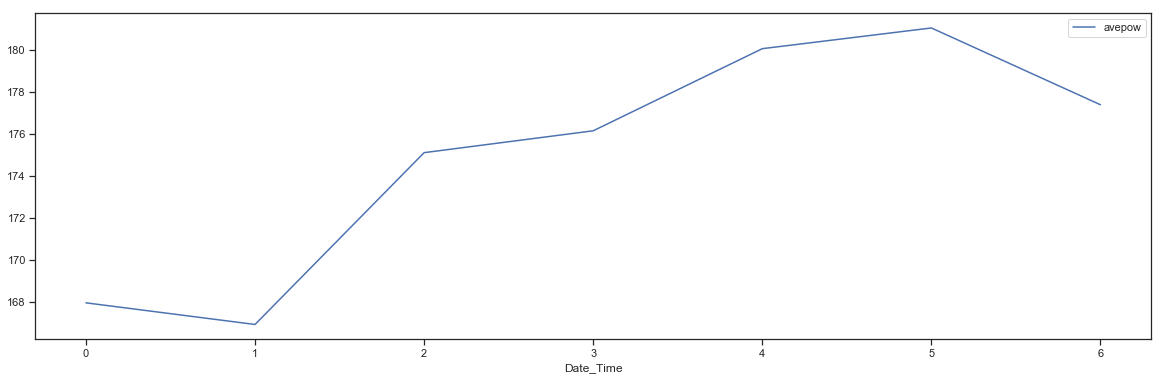

In [175]:
rcParams['figure.figsize'] = 20, 6

periodical_data_list[3][['avepow']].plot(style=['-'])
#data['2015'][['avepow']].plot(style=['.'])


## 4.2) Pairplot

In [148]:
data.columns

Index(['avetem', 'avegloirr', 'avepow', 'avewinspe', 'CO2', 'maxtem',
       'maxgloirr', 'maxpow', 'maxwinspe', 'mintem', 'NOx', 'SOx', 'ineene',
       'aggintene', 'aggavepow', 'aggcumene'],
      dtype='object')

In [160]:
start_date = '2012'
end_date = '2012'
column_list1 = ['avetem', 'avegloirr', 'avepow', 'avewinspe', 'CO2', 'maxtem','maxgloirr']
column_list2 = ['avepow', 'maxpow', 'maxwinspe', 'mintem', 'NOx']
column_list3 = ['avepow','SOx', 'ineene','aggintene', 'aggavepow', 'aggcumene']

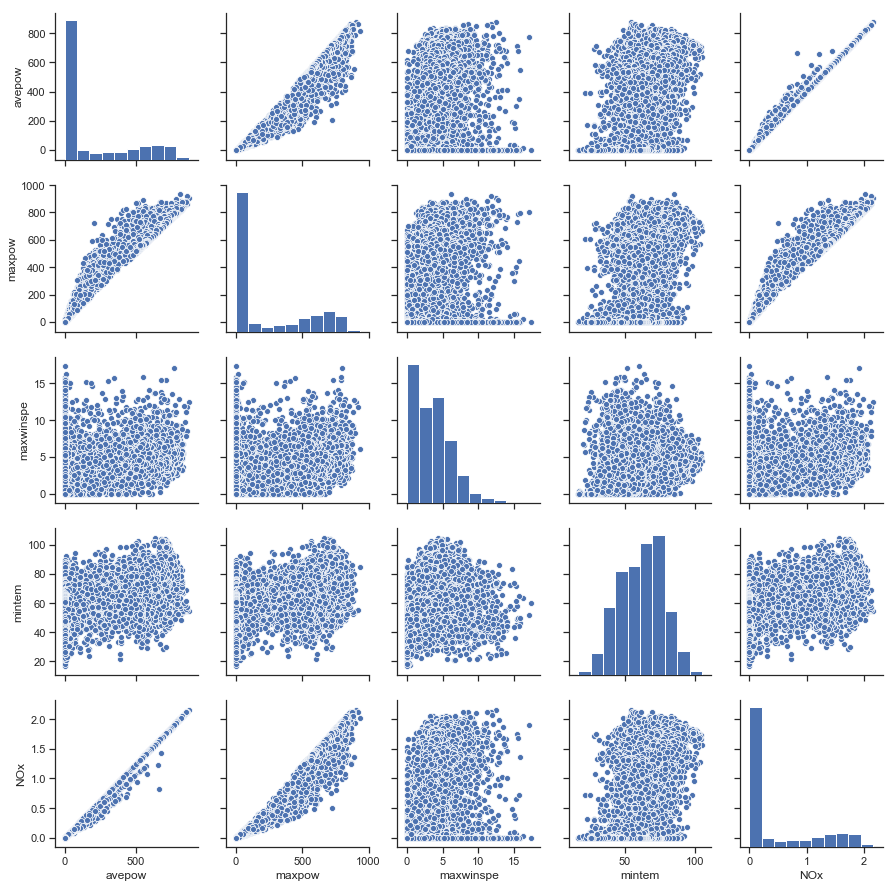

In [161]:
def pairplot(start_date, end_date, column_list):
    partial_data = data[start_date : end_date]
    simple_data = partial_data[column_list]

    # Time vs Temperature vs Load pairplot
    sns.set(style="ticks", color_codes=True)

    sns_plot = sns.pairplot(simple_data)
    #sns_plot.savefig(data_dir + "_pairplot.png")

  
pairplot(start_date, end_date, column_list2)

# To-do

- change time 0 to 24
- compare graphs
- one-variable
- interaction term
- box plot